# The goal of this project is to build a model that will predict the aspects of concrete strength

#### This can also be found on [my Git repository](https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-94Sip)


## Step 1 - EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.model_selection import train_test_split,cross_validate, KFold 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [5]:
conc = pd.read_csv('concrete.csv')
print(f"Shape of concrete dataset: {conc.shape}")

Shape of concrete dataset: (1030, 9)


In [3]:
conc.head(15)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [17]:
conc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1005 non-null   float64
 1   slag          1005 non-null   float64
 2   ash           1005 non-null   float64
 3   water         1005 non-null   float64
 4   superplastic  1005 non-null   float64
 5   coarseagg     1005 non-null   float64
 6   fineagg       1005 non-null   float64
 7   age           1005 non-null   int64  
 8   strength      1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


#### Observation - no missing values in any of the rows

In [5]:
conc.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

#### Observation - since all the columns are of numeric type (no categorical columns, as of yet, there is not much insight to be gained from looking at unique value)

In [13]:
dup_rows = conc[conc.duplicated(keep="first")]

dup_rows.shape

(25, 9)

#### Observation - there are appear to be 25 duplicated rows; let's dive into that 

In [14]:
dup_rows.sort_values(by=['cement','strength'])

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
943,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
576,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
933,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7,55.90
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
738,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
967,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30


In [6]:
conc.drop_duplicates(inplace=True, keep='first')

In [16]:
conc.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


#### Observations:
1. slag, ash and superplastic appear to have some 0 values - need to determine if those are accurate, or if values need to be imputed, such as mean or mode

### Univariate Analysis

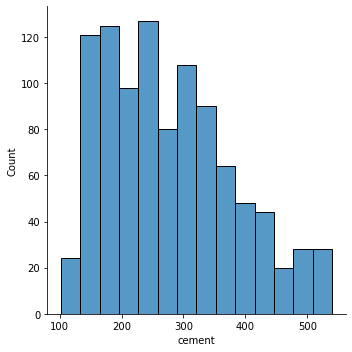

In [36]:
sns.displot(conc['cement'])

#### Observation:
cement looks relatively normal - only slightly skewed, but as expected since cement content can be reduced with the inclusion of other materials; no significant presence of outliers

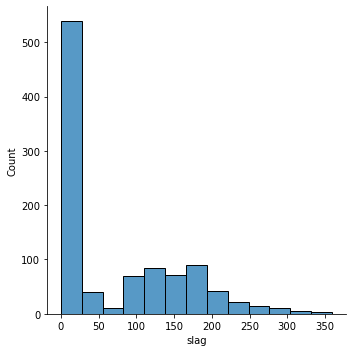

In [35]:
sns.displot(conc['slag'])

#### Observation
A significant number of records have a 0 value. This could be interpreted as a "missing value" however, slag is not a necessary component in concrete, so it is entirely possible that these Zero values are accurate, and not representative of a data quality problem.

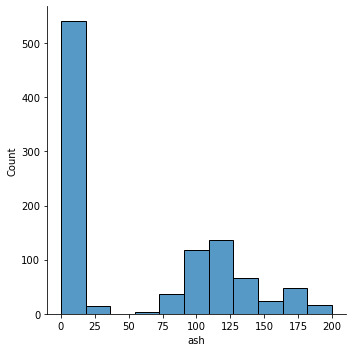

In [34]:
sns.displot(conc['ash'])

#### Observation
Similar to slag, a significant number of records have a 0 value. This could be interpreted as a "missing value" however, ash is not a necessary component in concrete, so it is entirely possible that these Zero values are accurate, and not representative of a data quality problem.

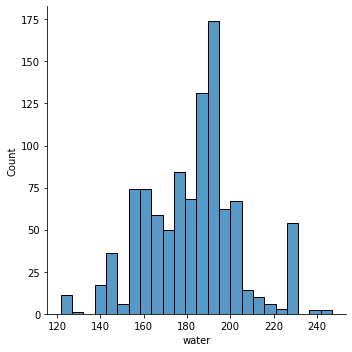

In [33]:
sns.displot(conc['water'])

#### Observation:
Water distribution looks faily normal, with some interesting data points between 220-230. No outliers, no appearance of missing data.

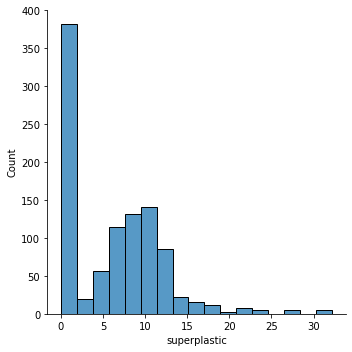

In [32]:
sns.displot(conc['superplastic'])

#### Observation
Similar to slag and ash, a significant number of records have a 0 value. This could be interpreted as a "missing value" however, superplastic is not a necessary component in concrete, so it is entirely possible that these Zero values are accurate, and not representative of a data quality problem.

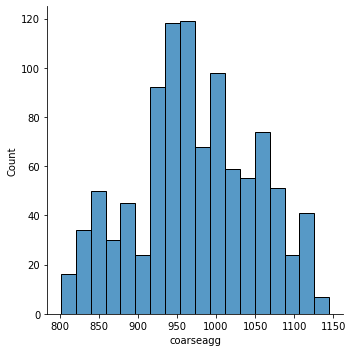

In [30]:
sns.displot(conc['coarseagg'])

#### Observation:
coarseagg looks fairly normal; no outliers, or what looks to be missing values

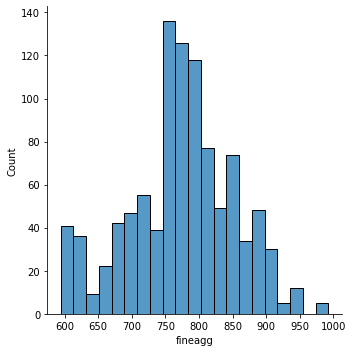

In [29]:
sns.displot(conc['fineagg'])

#### Observation:
fineagg looks fairly normal; no outliers, or what looks to be missing values

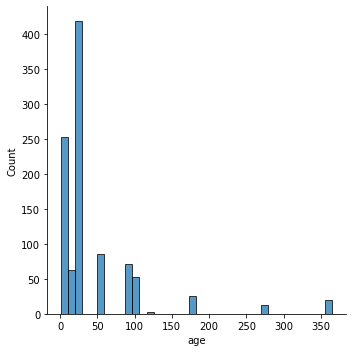

In [31]:
sns.displot(conc['age'])

#### Observation:
**Key Assumption: I am assuming age is being used for curing time.**

Obviously skewed but as expected since most concrete is cured within a 28 day window of time. There do appear to be some outliers, so those should be looked at further.

In [38]:
conc.query('age > 200').sort_values(by=['age','strength'])

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
878,237.5,237.5,0.0,228.0,0.0,932.0,594.0,270,38.41
951,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
149,380.0,95.0,0.0,228.0,0.0,932.0,594.0,270,41.15
297,475.0,0.0,0.0,228.0,0.0,932.0,594.0,270,42.13
850,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
570,190.0,190.0,0.0,228.0,0.0,932.0,670.0,270,50.66
262,266.0,114.0,0.0,228.0,0.0,932.0,670.0,270,51.73
623,380.0,0.0,0.0,228.0,0.0,932.0,670.0,270,53.30
632,304.0,76.0,0.0,228.0,0.0,932.0,670.0,270,54.38
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


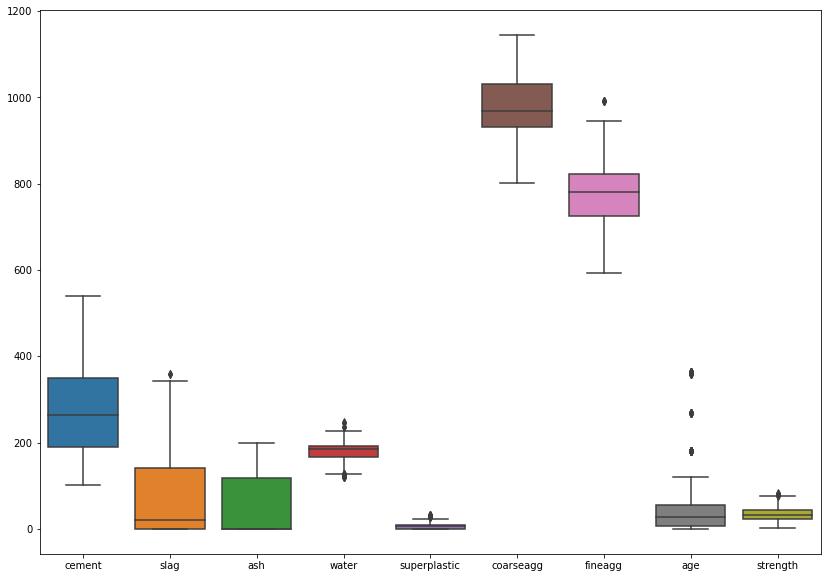

In [42]:
# box plots to look at outliers
plt.figure(figsize=(14,10))
box = sns.boxplot(data=conc)
box.set_xticklabels(labels=box.get_xticklabels());

#### Outlier Observations:
1. As commented earlier, slag, water, superplastic, fineagg, age, and strength have outliers.

#### Summary Observations from Univariate analysis:
1. Due to the potential for multi-collinearity between independent variables, we should scale the independent variables. This will also prove valuable should we introduce polynomial terms, vs simple linear regression.


### Bi-variate Analysis

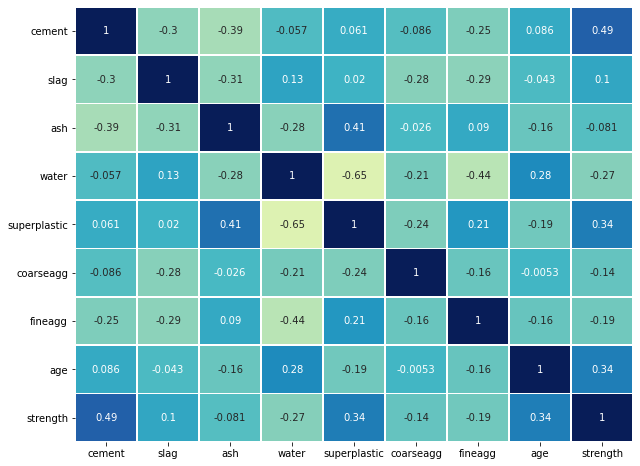

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(conc.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

#### Observations:
1. There is not a high-degree of positive collinearity between the independent variables.
2. There is a high-degree of negative collinearity between several independent variables, specifically superplastic and water, and fineagg and water.
3. Cement and superplastic and age seem to have the highest correlation with the dependent variable 'strength'

**Since superplastic has higher correlation with strength, it makes sense to keep that feature and drop water, but we will do Lasso technique and see what that says to confirm.**

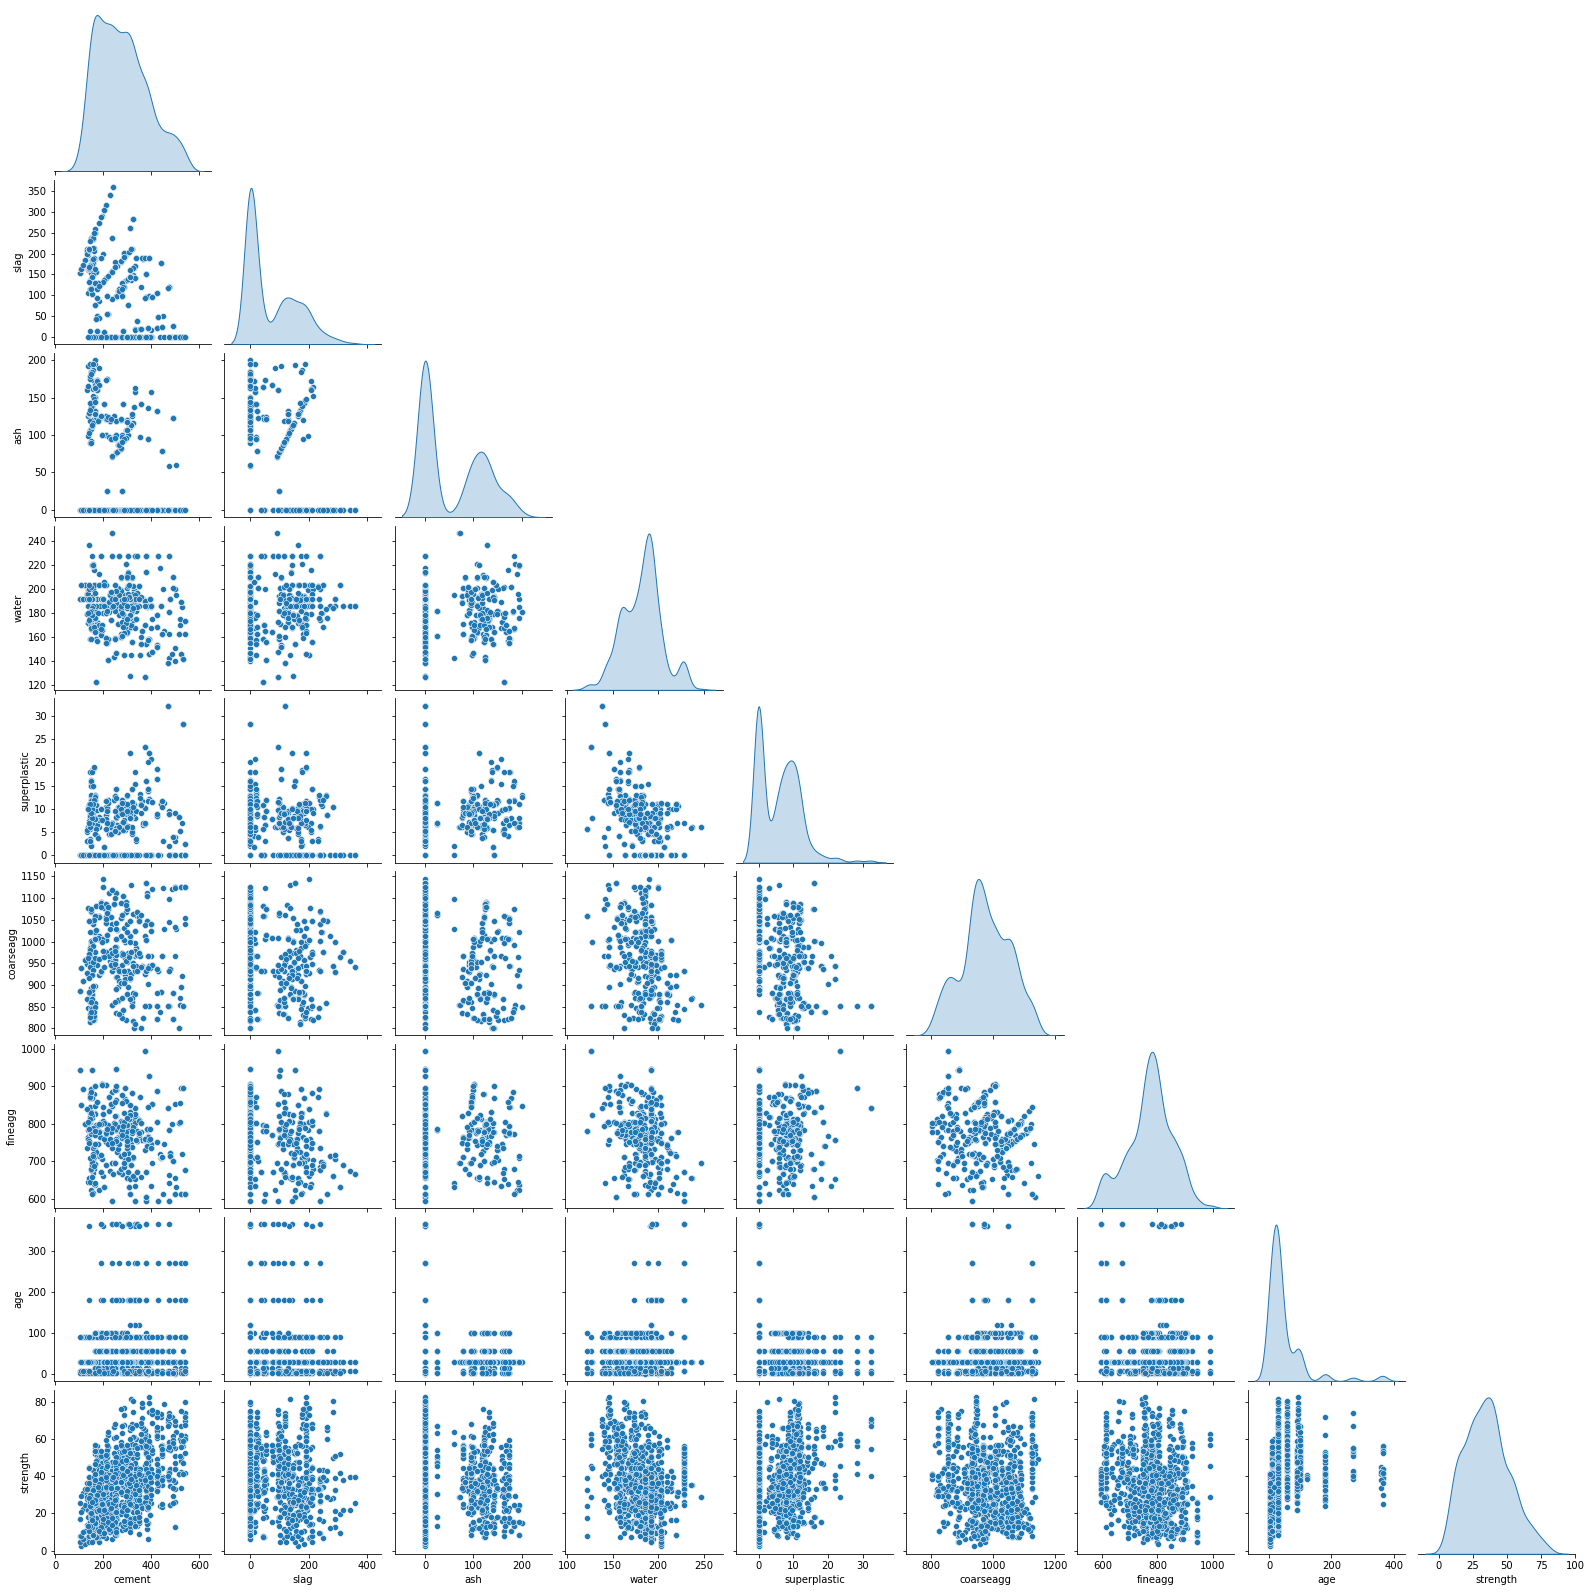

In [40]:
sns.pairplot(conc,diag_kind='kde',corner=True)

#### Observation: 
The scatter plots confirm what we noticed with the correlation heatmap - there are not many highly correlated independent features and there are not many independent variables correlated with strength. This gives us opportunity to consider new feature creation when we get to the Feature Engineering Section

## Feature Engineering

As my undergraduate degree is in Civil Engineering, and I took classes on concrete design and strength, I have some domain knowledge on this subject. However, I don't have my textbooks anymore so I did a google search and this link reminded me of the features which determine concrete strength, which leads to good feature engineering techniques:
[Concrete Strength](https://theconstructor.org/concrete/factors-affecting-strength-of-concrete/6220/)

This gives some good ideas to create new features, which are ratios of the columns

Some ideas for feature selection have been taken from [sklearn docs](https://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html)

#### Step 1: Adding two calculated features based on the article linked above

In [7]:
conc['water_cement'] = conc['water']/conc['cement']
conc['coarse_fine'] = conc['coarseagg']/conc['fineagg']

conc.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water_cement,coarse_fine
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,1.440198,1.298330
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,0.937241,1.357448
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.749600,1.111124
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,0.857143,1.391045
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,1.248708,1.503373


#### re-run correlations to see how these new features fare

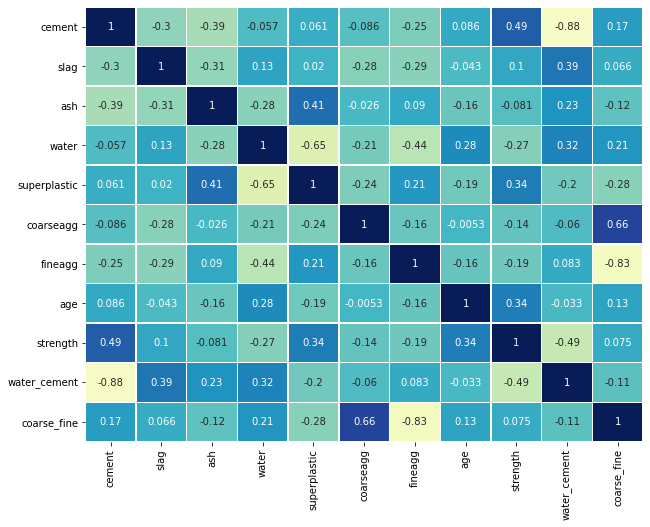

In [44]:
plt.figure(figsize=(10,8))
sns.heatmap(conc.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

#### Observation: the water/cement ratio is somewhat negatively correlated with strength

**_regarding whether this should be linear or quadratic (or even higher level), the linked article on concrete strength shows that strength is not a linear relationship, therefore we should look at polynomial feature addition_**

In [8]:
conc_eng = conc.copy()

X = conc_eng.drop("strength", axis=1)
y = conc_eng[["strength"]]

X.reset_index(inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1005 non-null   int64  
 1   cement        1005 non-null   float64
 2   slag          1005 non-null   float64
 3   ash           1005 non-null   float64
 4   water         1005 non-null   float64
 5   superplastic  1005 non-null   float64
 6   coarseagg     1005 non-null   float64
 7   fineagg       1005 non-null   float64
 8   age           1005 non-null   int64  
 9   water_cement  1005 non-null   float64
 10  coarse_fine   1005 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 86.5 KB


Based on reading [this link](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html)

I will be using the Robust scaler as I have chosen to not remove outliers.

When I looked at the data above, I think the outliers are explainable and should not be removed.

### The purpose of the next section is to understand the value of polynomial features over the raw dataset features

In [9]:
scores = pd.DataFrame()
#scores = scores.iloc[0:0]

In [10]:
# do the split of the data for this test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)
print(f"X_train.shape: {X_train.shape}")

X_train.shape: (703, 11)


In [11]:
#function to store scoring results in a datafrom for model comparison
def capture_regression_performance(clf, classifier_name, scores_df, x_train, y_train, x_test, y_test):
    train_r2 = clf.score(x_train, y_train)
    train_adj_r2 = adj_r2(train_r2, x_train.shape[0], x_train.shape[1])
    test_r2 = clf.score(x_test, y_test)
    test_adj_r2 = adj_r2(test_r2, x_test.shape[0], x_test.shape[1])
    
    clf_score = pd.DataFrame(
        {classifier_name: [train_r2, train_adj_r2, test_r2, test_adj_r2]},
        index=['Train R2','Train Adj R2','Test R2','Test Adj R2']
    )
    
    scores_df = pd.concat([scores_df, clf_score], axis=1).round(decimals=3)
    return scores_df

In [12]:
def adj_r2(r2, observations, features):
    return (1 - (((1 - r2) * (observations - 1)) / (observations - features - 1)))

In [13]:
ridge = Ridge(alpha=.4)
ridge_pipe = Pipeline([('scaler',RobustScaler()),('clf',ridge)])
ridge_pipe.fit(X_train,y_train)

print (f"Ridge model coefficients: {ridge_pipe['clf'].coef_}")
scores = capture_regression_performance(ridge_pipe, "Ridge: raw ds", scores, X_train, y_train, X_test, y_test)
scores

Ridge model coefficients: [[ -1.25264513  18.5696039   16.97043167  11.93062369  -2.09068046
    3.22891141   9.21241872  -4.27490071   5.15383949  -1.11481997
  -12.53628556]]


,Ridge: raw ds
Train R2,0.621
Train Adj R2,0.615
Test R2,0.579
Test Adj R2,0.563


In [14]:
lasso = Lasso(alpha=0.04, max_iter=8000)
lasso_pipe = Pipeline([('scaler',RobustScaler()),('clf',lasso)])
lasso_pipe.fit(X_train,y_train)
print (f"Lasso model coefficients: {lasso_pipe['clf'].coef_}")
scores = capture_regression_performance(lasso_pipe, "Lasso: raw ds", scores, X_train, y_train, X_test, y_test)
scores

Lasso model coefficients: [-1.13683155 16.55514847 15.60430642 10.84424381 -2.72296924  2.84206642
  4.1529504  -0.06153567  5.0050486  -1.72901309 -4.61053181]


,Ridge: raw ds,Lasso: raw ds
Train R2,0.621,0.617
Train Adj R2,0.615,0.611
Test R2,0.579,0.585
Test Adj R2,0.563,0.569


#### Observations:
1. Using Robust scalar, Lasso and Ridge doesn't seem to perform very well on the "raw" dataset (no polynomial features) -> underfit.
2. Including adjusted R2 doesn't make much difference since there are not many features

### Now, let's look at adding polynomial features to the dataset and see how if the model performs better

In [15]:
 #create polynomial features - this must be done against the raw dataset, before any form of scaling
poly = PolynomialFeatures(degree = 2, interaction_only=True)    
poly_ft = poly.fit_transform(X)
poly_df = pd.DataFrame(poly_ft, columns=['feat_'+str(x) for x in range(poly_ft.shape[1])])

X_poly = pd.concat([X,poly_df], axis=1)
#X_poly['strength'] = y

X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.30, random_state=5)

#ridge regression
ridge_pipe.fit(X_poly_train,y_poly_train)
print (f"Ridge model coefficients: {ridge_pipe['clf'].coef_}")
ds_name = f"Ridge poly=2"
scores = capture_regression_performance(ridge_pipe, ds_name, scores, X_poly_train, y_poly_train, X_poly_test, y_poly_test)

#lasso regression - increasing max_iter to avoid convergence warning
lasso = Lasso(alpha=0.04, max_iter=20000)
lasso_pipe = Pipeline([('scaler',RobustScaler()),('clf',lasso)])
lasso_pipe.fit(X_poly_train,y_poly_train)
print (f"Lasso model coefficients: {lasso_pipe['clf'].coef_}")
ds_name = f"Lasso poly=2"
scores = capture_regression_performance(lasso_pipe, ds_name, scores, X_poly_train, y_poly_train, X_poly_test, y_poly_test)

#poly_df = None
#X_poly = None

scores

Ridge model coefficients: [[-2.67256959e+00  9.35424822e+00  1.30792380e+00 -1.32105862e-01
   5.13824382e+00  1.09676932e+00  2.12663167e+00 -5.34220198e-02
   4.41695054e+00 -2.97584473e+00 -8.33221574e+00  0.00000000e+00
  -2.67256959e+00  9.35424822e+00  1.30792380e+00 -1.32105862e-01
   5.13824382e+00  1.09676932e+00  2.12663167e+00 -5.34220198e-02
   4.41695054e+00 -2.97584473e+00 -8.33221574e+00 -2.40702059e-01
  -8.31381438e-01  7.24077716e-01  5.38528609e+00  2.03004129e+00
  -6.14327485e-02 -3.99587642e-01  2.71945012e-01  2.23461292e+00
  -3.43590402e+00 -5.11724372e-01 -4.66308026e+00 -1.58602489e+01
  -1.40443653e+01  5.20750002e+00  4.67568250e+00  4.91099101e+00
   5.13824382e+00  3.72799611e+00  3.53250662e-04 -2.51415081e-01
  -3.37612364e-01  8.81049346e+00  1.01506789e+01  3.16524959e+00
  -2.57271487e+00 -8.27453801e+00 -2.37929061e+00 -4.02789856e+00
   8.93830728e+00  1.18955524e+01  4.78553369e+00 -8.67482811e+00
  -1.06409955e+00  1.46148004e+01 -6.89098870e+00 

,Ridge: raw ds,Lasso: raw ds,Ridge poly=2,Lasso poly=2
Train R2,0.621,0.617,0.756,0.729
Train Adj R2,0.615,0.611,0.725,0.695
Test R2,0.579,0.585,0.734,0.713
Test Adj R2,0.563,0.569,0.642,0.612


#### Observations: 
1. Polynomial features was adjusted between 2-3. Including Adjusted R2 accounts for adding all the polynomial features and is a good measure to compare performance of different models with different features.
2. Polynomial degrees of 3 shows significant overfitting, when adjusted R2 is < 37% for both Lasso and Ridge
3. Polynomial degrees of freedom =2 seems to performs approximately 6% better than the dataset without polynomial features
4. Polynomial with DoF=2 has 56 features. Since it does not seem to perform significantly better than the basic dataset, I am going to seek to optimize against the raw dataset.  


_Note: based on research I have done, we know that concrete strength is NOT a linear function. Therefore, we want to choose models which better handle non-linear relationships_

## Step 2: Model Building & Tuning

In [16]:
#resetting y to be a single array, not a series
y = conc_eng["strength"]

In [17]:
cv_scores_df = pd.DataFrame()

def capture_model_cv_performance(classifier_name, scores_df, model_metrics):

    clf_score = pd.DataFrame(
        {classifier_name: [model_metrics['train_r2'].mean(), 
                           model_metrics['test_r2'].mean(), 
                           model_metrics['train_neg_mean_absolute_error'].mean(), 
                           model_metrics['test_neg_mean_absolute_error'].mean(),
                           model_metrics['train_neg_mean_squared_error'].mean(), 
                           model_metrics['test_neg_mean_squared_error'].mean(),
                           model_metrics['train_explained_variance'].mean(), 
                           model_metrics['test_explained_variance'].mean()]},
        index=['Train R2','Test R2','Train MAE','Test MAE','Train Sq Err','Test Sq Err','Train Expl Var','Test Expl Var']
    )
    
    scores_df = pd.concat([scores_df, clf_score], axis=1).round(decimals=3)
    return scores_df

In [18]:
# Model possibilities: SVM with non-linear kernel, RandomForest Regressor, Gradient Boosting Regressor, Bagging Regressor

from sklearn.svm import SVR 
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor


#create dict of pipelines to evaluate performance of various models
pipelines = []
pipelines.append(('SupportVectorRegressor',Pipeline([('scaler',RobustScaler()),('SVR',SVR())])))
pipelines.append(('RandomForestRegressor',Pipeline([('scaler',RobustScaler()),('RBR',RandomForestRegressor())])))
pipelines.append(('BaggingRegressor',Pipeline([('scaler',RobustScaler()),('BGR',BaggingRegressor())])))
pipelines.append(('GradientBoostRegressor',Pipeline([('scaler',RobustScaler()),('GBR',GradientBoostingRegressor())])))

#### Notes:
1. Since this step in the process is to find several models to tune, we are going to split the data here and do CV on the "train split" - this will leave the "test set" for us to actually test against, once we have fine-tuned the model
2. Using the pipeline approach above allows us to use the scalar against the "train set" and avoid any data leakage issues

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=8)
kfold = KFold(n_splits=10, shuffle=True, random_state=7) 

for idx, val in enumerate(pipelines):
    clf_name, pipe = val    
    scores = cross_validate(pipe, 
                            X_train, 
                            y_train, 
                            cv=kfold, 
                            scoring=('r2','neg_mean_absolute_error', 'neg_mean_squared_error', 'explained_variance'), 
                            return_train_score=True)
    cv_scores_df = capture_model_cv_performance(clf_name, cv_scores_df, scores)
    
    

cv_scores_df
    

,SupportVectorRegressor,RandomForestRegressor,BaggingRegressor,GradientBoostRegressor
Train R2,0.691,0.984,0.977,0.956
Test R2,0.667,0.892,0.878,0.895
Train MAE,-6.790,-1.469,-1.683,-2.643
Test MAE,-7.205,-3.943,-4.141,-3.919
Train Sq Err,-82.070,-4.159,-6.006,-11.813
Test Sq Err,-87.891,-28.353,-32.116,-27.108
Train Expl Var,0.693,0.984,0.977,0.956
Test Expl Var,0.672,0.894,0.880,0.897


### Observations:
1. Since we are using the RobustScalar and we have not removed the outliers, which are not significant, I believe the right metrics are Mean Absolute Error and R2. R2 is easily uderstandable by most people who have been involved in regression problems.
2. Based on these metrics, RandomForest appears to perfrom best, followed by BaggingRegressor

In [191]:
cv_scores_df = cv_scores_df.iloc[0:0]

### Use RandomizedSearchCV to tweak hyper-parameters of the RandomForest and GradientBoost models

In [28]:
optimized_df = pd.DataFrame()

def optimized_performance(classifier_name, scores_df, best_train_r2, best_val_r2, search, x_test, y_test):

    y_pred = search.predict(x_test)
    test_r2 = r2_score(y_test, y_pred)
    
    clf_score = pd.DataFrame(
        {classifier_name: [best_train_r2, 
                           best_val_r2, 
                           test_r2,
                           mean_absolute_error(y_test, y_pred),
                           mean_squared_error(y_test, y_pred),
                           explained_variance_score(y_test, y_pred)]},
        index=['Train R2','Validation R2','Test R2',
               'Test MAE',
               'Test Sq Err',
               'Test Expl Var']
    )
    
    scores_df = pd.concat([scores_df, clf_score], axis=1).round(decimals=3)
    return scores_df

In [29]:
from sklearn.model_selection import RandomizedSearchCV

rf_param_dist = {'RFR__bootstrap': [True, False],
                 'RFR__n_estimators': [100,200,500,1000],
                 'RFR__max_features': ['auto','sqrt',4,5,6],
                 'RFR__min_samples_split': [10,20,30,40,50],
                 'RFR__min_samples_leaf': [1,2,3,4,5,6,10],
                 'RFR__max_depth': [None,2,3,5,7,10]}

rf = RandomForestRegressor(random_state=9)

opt_kfold = KFold(n_splits=10, shuffle=True, random_state=4) 

rf_pipe = Pipeline([('scaler',RobustScaler()),('RFR',rf)])

rf_opt = RandomizedSearchCV(rf_pipe,
                            n_jobs=4,
                            n_iter = 15,
                            return_train_score=True,
                            param_distributions=rf_param_dist,
                            cv=opt_kfold,
                            refit=True)

rf_opt.fit(X_train,y_train)
   
results_df = pd.DataFrame(rf_opt.cv_results_).sort_values(by='rank_test_score')
val_r2, train_r2 = results_df.iloc[0,[20,33]]

optimized_df = optimized_performance('RF', optimized_df, train_r2, val_r2, rf_opt, X_test, y_test)

optimized_df    

,RF
Train R2,0.945
Validation R2,0.851
Test R2,0.875
Test MAE,4.401
Test Sq Err,32.880
Test Expl Var,0.875


In [30]:
gb_param_dist = {'GBR__loss': ['ls','huber'],
                  'GBR__learning_rate': [0.1,0.3,0.5,0.7,0.9],
                  'GBR__n_estimators': [100,200,500,1000],
                  'GBR__max_depth':[None,3,7,10,20,50],
                  'GBR__max_features':[4,5,6,8,10]}

gb = GradientBoostingRegressor(random_state=10)
gb_pipe = Pipeline([('scaler',RobustScaler()),('GBR',gb)])
gb_opt = RandomizedSearchCV(gb_pipe,
                            n_jobs=4,
                            n_iter = 15,
                            return_train_score=True,
                            param_distributions=gb_param_dist,
                            cv=opt_kfold,
                            refit=True)

gb_opt.fit(X_train,y_train)
   
results_df = pd.DataFrame(gb_opt.cv_results_).sort_values(by='rank_test_score')

val_r2, train_r2 = results_df.iloc[0,[20,33]]

optimized_df = optimized_performance('GB', optimized_df, train_r2, val_r2, gb_opt, X_test, y_test)

optimized_df

,RF,GB
Train R2,0.945,0.994
Validation R2,0.851,0.917
Test R2,0.875,0.923
Test MAE,4.401,3.125
Test Sq Err,32.880,20.302
Test Expl Var,0.875,0.923


In [37]:
gb_opt.best_params_

{'GBR__n_estimators': 500,
 'GBR__max_features': 10,
 'GBR__max_depth': 3,
 'GBR__loss': 'ls',
 'GBR__learning_rate': 0.1}

In [44]:
import eli5
#gb_pipe.fit(X_train,y_train)
#eli5.explain_weights(gb_pipe.named_steps['GBR'], top=50, feature_names=list(X_train.columns))

eli5.explain_weights(gb_opt.best_estimator_, top=50, feature_names=list(X_train.columns))

Weight,Feature
0.3624 ± 0.3281,age
0.3341 ± 0.2765,water_cement
0.0844 ± 0.2717,slag
0.0665 ± 0.3227,water
0.0396 ± 0.2448,superplastic
0.0347 ± 0.3339,fineagg
0.0280 ± 0.2306,cement
0.0145 ± 0.2944,coarseagg
0.0134 ± 0.2282,coarse_fine
0.0119 ± 0.5037,index


### Analysis:

1. As can be seen above, using KFold cross-validation, the cv "test" fold is what I am calling "validation" since this is what the hyperparameters were tuned against. Therefore, the last 2 models (RandomForest and GradientBoosting) were then tested against the test data that was held out from train_test_split. This prevented the "data leakage" problem. 
2. Using RandomizedSearchCV, GradientBoosting appears to perform very best against the true test set, across all metrics, inclusive of R2, MAE, MSE, and explained variance.
3. Interestingly enough, the "optimized" RandomForest regressor performance did not increase notably. My opinion on the reasoning for this is that the parameter distribution that was applied to RandomizedSearch was not the best set of parameters to sample from, over the defaults that were applied in the earlier step.
4. The top 2 features were 'age' and the engineered feature 'water-cement', which is the calculated ratio that we added to the dataset. Based on my recollection of concrete engineering from undergraduate eduction, these 2 features make the most sense. So this model seems rather easily explainable.

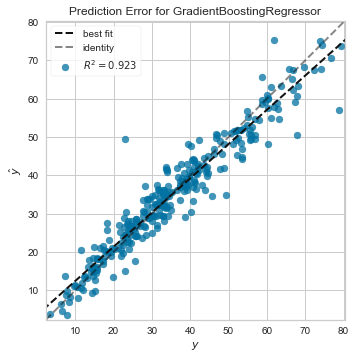

In [45]:
from yellowbrick.regressor import prediction_error

# Instantiate the linear model and visualizer
#model = Lasso()

visualizer = prediction_error(gb_opt.best_estimator_, X_train, y_train, X_test, y_test, isFitted=True)

#### Observations:
1. Plotting the prediction errors shows that our test R2 is good.

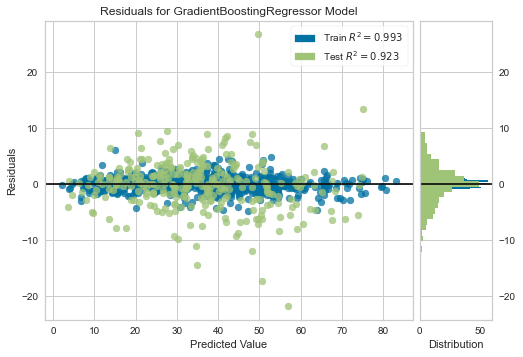

In [46]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(gb_opt.best_estimator_, X_train, y_train, X_test, y_test, isFitted=True)

#### Observations:
1. plotting of the residuals shows an overlap with the training data with a slightly higher spread, which correlates with the higher mean squared error shown earlier, but overall gives a good indication of the fit of this model.